In [56]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import plotly.graph_objs as go
import matplotlib.pyplot as plt
from keras import optimizers
from keras.utils import plot_model
from keras.models import Sequential, Model
from keras.layers import Conv2D
from keras.layers import Dense, LSTM, RepeatVector, TimeDistributed, Flatten
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot

## Data Loading and Visualization

In [59]:
# Read salary data
file_path = Path("Resources/global-data-on-sustainable-energy (1).csv")
df_energy = pd.read_csv(file_path)

# Display sample data
df_energy.head()

,Entity,Year,Access to electricity (% of population),Access to clean fuels for cooking,Renewable-electricity-generating-capacity-per-capita,Financial flows to developing countries (US $),Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),...,Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy (MJ/$2017 PPP GDP),Value_co2_emissions_kt_by_country,Renewables (% equivalent primary energy),gdp_growth,gdp_per_capita,Density\n(P/Km2),Land Area(Km2),Latitude,Longitude
0,Afghanistan,2000,1.613591,6.2,9.22,20000.0,44.99,0.16,0.0,0.31,...,302.59482,1.64,760.000000,NaN,NaN,NaN,60,"6,52,230",33.93911,67.709953
1,Afghanistan,2001,4.074574,7.2,8.86,130000.0,45.60,0.09,0.0,0.50,...,236.89185,1.74,730.000000,NaN,NaN,NaN,60,"6,52,230",33.93911,67.709953
2,Afghanistan,2002,9.409158,8.2,8.47,3950000.0,37.83,0.13,0.0,0.56,...,210.86215,1.40,1029.999971,NaN,NaN,179.426579,60,"6,52,230",33.93911,67.709953
3,Afghanistan,2003,14.738506,9.5,8.09,25970000.0,36.66,0.31,0.0,0.63,...,229.96822,1.40,1220.000029,NaN,8.832278,190.683814,60,"6,52,230",33.93911,67.709953
4,Afghanistan,2004,20.064968,10.9,7.75,NaN,44.24,0.33,0.0,0.56,...,204.23125,1.20,1029.999971,NaN,1.414118,211.382074,60,"6,52,230",33.93911,67.709953


## Aggregate the CO2 Emissions by Year

In [64]:
year_emissions = df_energy.groupby('Year', as_index=False)['Value_co2_emissions_kt_by_country'].sum()
Country_year_emissions = df_energy.groupby(['Entity', 'Year'], as_index=False)['Value_co2_emissions_kt_by_country'].sum()

In [74]:
from sklearn.linear_model import LinearRegression

In [79]:
df_emissions_usa = df_energy[df_energy["Entity"] == 'United States']
df_emissions_usa.head()

,Entity,Year,Access to electricity (% of population),Access to clean fuels for cooking,Renewable-electricity-generating-capacity-per-capita,Financial flows to developing countries (US $),Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),...,Energy intensity level of primary energy (MJ/$2017 PPP GDP),Value_co2_emissions_kt_by_country,Renewables (% equivalent primary energy),gdp_growth,gdp_per_capita,Density\n(P/Km2),Land Area(Km2),Latitude,Longitude,CO2_emissions_lag_1
3502,United States,2000,100.0,100.0,NaN,NaN,5.43,2697.28,753.89,350.93,...,6.73,5775810.000,4.027357,4.127484,36334.90878,36,"98,33,517",37.09024,-95.712891,NaN
3503,United States,2001,100.0,100.0,NaN,NaN,4.68,2678.68,768.83,280.06,...,6.54,5748260.000,3.421371,0.998341,37133.24281,36,"98,33,517",37.09024,-95.712891,5775810.000
3504,United States,2002,100.0,100.0,NaN,NaN,4.84,2727.83,780.06,336.34,...,6.50,5593029.785,4.015507,1.741695,38023.16111,36,"98,33,517",37.09024,-95.712891,5748260.000
3505,United States,2003,100.0,100.0,NaN,NaN,5.33,2756.03,763.73,349.18,...,6.33,5658990.234,4.180040,2.861211,39496.48588,36,"98,33,517",37.09024,-95.712891,5593029.785
3506,United States,2004,100.0,100.0,NaN,NaN,5.48,2818.28,788.53,345.14,...,6.22,5738290.039,4.101511,3.798891,41712.80107,36,"98,33,517",37.09024,-95.712891,5658990.234


In [83]:
columns_to_clean = ["Value_co2_emissions_kt_by_country"]
df_emissions_usa_cleaned = df_emissions_usa.dropna(subset=columns_to_clean)

df_emissions_usa_cleaned['Year'].unique()

array([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
       2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019], dtype=int64)

In [93]:
# Feature engineering (adding lag features)
df_emissions_usa_cleaned['CO2_emissions_lag_1'] = df_emissions_usa_cleaned['Value_co2_emissions_kt_by_country'].shift(1)


C:\Users\61450\AppData\Local\Temp\ipykernel_22804\916685402.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [94]:
df_emissions_usa_cleaned = df_emissions_usa_cleaned[1:]

In [95]:

# Split data into training and testing sets
train_data, test_data = train_test_split(df_emissions_usa_cleaned, test_size=0.2, shuffle=False)


In [96]:

# Create feature matrix and target variable
X_train = train_data[['Year', 'CO2_emissions_lag_1']].values
X_train

array([[2.00100000e+03, 5.77581000e+06],
       [2.00200000e+03, 5.74826000e+06],
       [2.00300000e+03, 5.59302979e+06],
       [2.00400000e+03, 5.65899023e+06],
       [2.00500000e+03, 5.73829004e+06],
       [2.00600000e+03, 5.75349023e+06],
       [2.00700000e+03, 5.65308008e+06],
       [2.00800000e+03, 5.73631982e+06],
       [2.00900000e+03, 5.55837988e+06],
       [2.01000000e+03, 5.15643018e+06],
       [2.01100000e+03, 5.39210986e+06],
       [2.01200000e+03, 5.17360010e+06],
       [2.01300000e+03, 4.95606006e+06],
       [2.01400000e+03, 5.09210010e+06],
       [2.01500000e+03, 5.10720996e+06]])

In [100]:
y_train = train_data['Value_co2_emissions_kt_by_country'].values
X_test = test_data[['Year', 'CO2_emissions_lag_1']].values
X_test

array([[2.01600000e+03, 4.99070996e+06],
       [2.01700000e+03, 4.89450000e+06],
       [2.01800000e+03, 4.81937012e+06],
       [2.01900000e+03, 4.97531006e+06]])

In [ ]:
y_test = test_data['Value_co2_emissions_kt_by_country'].values


In [98]:

# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

Root Mean Squared Error: 97807.04316683506


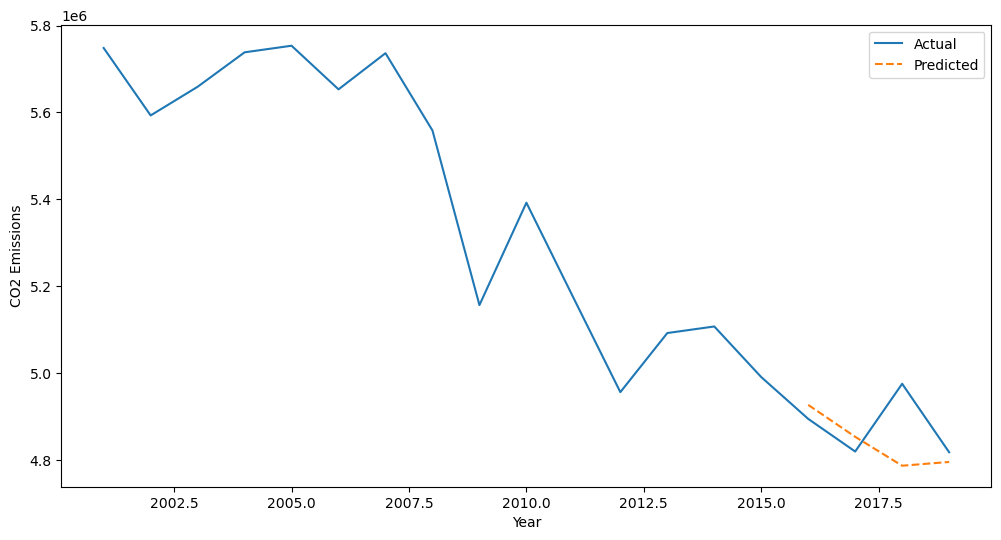

In [99]:

# Make predictions
y_pred = model.predict(X_test)

# Calculate RMSE
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f"Root Mean Squared Error: {rmse}")

# Visualization
plt.figure(figsize=(12, 6))
plt.plot(df_emissions_usa_cleaned['Year'], df_emissions_usa_cleaned['Value_co2_emissions_kt_by_country'], label='Actual')
plt.plot(test_data['Year'], y_pred, label='Predicted', linestyle='dashed')
plt.xlabel('Year')
plt.ylabel('CO2 Emissions')
plt.legend()
plt.show()

In [62]:
year_emissions_plot = go.Scatter(x=year_emissions['Year'], y=year_emissions['Value_co2_emissions_kt_by_country'])
layout = go.Layout(title='CO2 Total Emissions', xaxis=dict(title='Year'), yaxis=dict(title='Value_co2_emissions_kt_by_country'))
fig = go.Figure(data=[year_emissions_plot], layout=layout)
iplot(fig)

In [69]:
emissions_country = []
for country in Country_year_emissions['Entity'].unique():
    current_year_emission = Country_year_emissions[(Country_year_emissions['Entity'] == country)]
    emissions_country.append(go.Scatter(x=current_year_emission['Year'], y=current_year_emission['Value_co2_emissions_kt_by_country']))

layout = go.Layout(title='CO2 Emissions by Country', xaxis=dict(title='Year'), yaxis=dict(title='Value_co2_emissions_kt_by_country'))
fig = go.Figure(data=emissions_country, layout=layout)
iplot(fig)

In [70]:
df_emissions_australia = df_energy[df_energy["Entity"] == 'Australia']
df_emissions_australia.head()

,Entity,Year,Access to electricity (% of population),Access to clean fuels for cooking,Renewable-electricity-generating-capacity-per-capita,Financial flows to developing countries (US $),Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),...,Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy (MJ/$2017 PPP GDP),Value_co2_emissions_kt_by_country,Renewables (% equivalent primary energy),gdp_growth,gdp_per_capita,Density\n(P/Km2),Land Area(Km2),Latitude,Longitude
168,Australia,2000,100.0,100.0,NaN,NaN,8.42,181.05,0.0,17.11,...,68632.96,6.16,339450.0000,3.988878,3.912428,21697.70848,3,"77,41,220",-25.274398,133.775136
169,Australia,2001,100.0,100.0,NaN,NaN,8.37,194.33,0.0,17.40,...,68338.28,5.91,345640.0000,3.870762,2.038301,19527.32358,3,"77,41,220",-25.274398,133.775136
170,Australia,2002,100.0,100.0,NaN,NaN,8.74,197.29,0.0,17.35,...,68892.78,5.89,353369.9951,3.931450,4.014527,20117.78889,3,"77,41,220",-25.274398,133.775136
171,Australia,2003,100.0,100.0,NaN,NaN,7.15,195.13,0.0,18.50,...,69082.79,5.78,352579.9866,4.014969,3.110325,23492.40517,3,"77,41,220",-25.274398,133.775136
172,Australia,2004,100.0,100.0,NaN,NaN,6.68,203.66,0.0,19.41,...,70486.32,5.65,365809.9976,4.036561,4.205447,30513.94174,3,"77,41,220",-25.274398,133.775136


In [44]:
columns_to_keep = ["Year", "Value_co2_emissions_kt_by_country"]
df_emissions_usa = df_emissions_usa[columns_to_keep]

In [45]:
df_emissions_usa.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21 entries, 3502 to 3522
Data columns (total 2 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Year                               21 non-null     int64  
 1   Value_co2_emissions_kt_by_country  20 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 504.0 bytes


In [46]:
df_emissions_usa['Year'] = pd.to_datetime(df_emissions_usa['Year'])

In [47]:
df_emissions_usa.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21 entries, 3502 to 3522
Data columns (total 2 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             --------------  -----         
 0   Year                               21 non-null     datetime64[ns]
 1   Value_co2_emissions_kt_by_country  20 non-null     float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 504.0 bytes


In [71]:
#MLP for time series forecasting

from pandas import read_csv
dataframe = read_csv('covid19processed_data.csv', usecols=[0], engine='python')
dataset = dataframe.values

#converting multidimensional array to single dim
data = dataset.flatten() 
raw_seq = data.tolist()

#split a univariate sequence into samples
def split_sequence(sequence, n_steps):
 X, y = list(), list()
 for i in range(len(sequence)):
  # find the end of this pattern
  end_ix = i + n_steps
  # check if we are beyond the sequence
  if end_ix > len(sequence)-1:
   break
  #input and output sample
  seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
  X.append(seq_x)
  y.append(seq_y)
 return array(X), array(y)

from numpy import array
from keras.models import Sequential
from keras.layers import Dense

#choose a number of time steps
n_steps = 3
#split into samples
X, y = split_sequence(raw_seq, n_steps)

#define model
model = Sequential()
model.add(Dense(150, activation='relu', input_dim=n_steps))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse',metrics =['accuracy'])

#fit model
model.fit(X, y, epochs=3000, verbose=1)

#prediction for 156thday
x_input = array([13758429,14377942,15046478])
x_input = x_input.reshape((1, n_steps))
yhat = model.predict(x_input, verbose=0)
print(yhat)

#prediction for 157th day
x_input = array([14377942,15046478,15733087])
x_input = x_input.reshape((1, n_steps))
yhat = model.predict(x_input, verbose=1)
print(yhat)

#prediction for 158th day
x_input = array([15046478,15733087,16455969])
x_input = x_input.reshape((1, n_steps))
yhat = model.predict(x_input, verbose=1)
print(yhat)

FileNotFoundError: [Errno 2] No such file or directory: 'covid19processed_data.csv'